In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# 1. EDA

In [2]:
transportation = pd.read_csv('Monthly_Transportation_Statistics.csv')

In [3]:
transportation["Date Simple"] = pd.DatetimeIndex(transportation["Date"]).month.astype('str') + '/' +  pd.DatetimeIndex(transportation["Date"]).year.astype('str')

## Quantitative Variable #1: Utilization of Transportation

Something we are looking at for our first research question is utilization of transportation, however, theres not a set way to measure this so let's look at a couple of measures changes over time. We'll first look at automotive transportation, then we will look at a few alternative sources of transportation.

### 1. Highway Fatalities

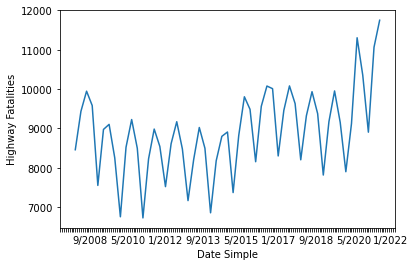

In [4]:
fatal_plot = sns.lineplot(data=transportation, x='Date Simple', y='Highway Fatalities');
for ind, label in enumerate(fatal_plot.get_xticklabels()):
    if ind % 20 == 0:  # every 20th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.plot();

### 2. Highway Vehicle Miles Traveled - All Systems

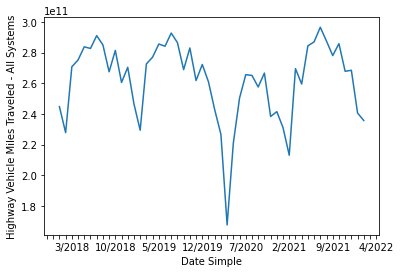

In [5]:
miles_plot = sns.lineplot(data=transportation, x='Date Simple', y='Highway Vehicle Miles Traveled - All Systems');
for ind, label in enumerate(miles_plot.get_xticklabels()):
    if ind % 7 == 0:  # every 7th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.plot();

These two metrics seem the most obvious to measure automotive utilization. The second, miles traveled, is a much more obvious choice for measuring, however, it has only been measured since 2018, which is an inherent weakness. The first, is more difficult to draw a direct illustration of increased utilization, however it should logically follow that the more auto transportation is utilized the more fatalities occur. With both of them we notice a cyclic trend that follows eachother, where utilization is seasonally effected with more usage in the summer and less in the winter. There is also a potential trend of consistent increase over time. 

### 3. Passenger Rail Passengers 

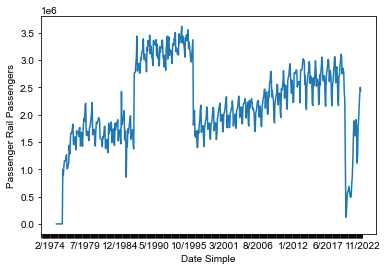

In [6]:
rail_plot = sns.lineplot(data=transportation, x='Date Simple', y='Passenger Rail Passengers');
for ind, label in enumerate(rail_plot.get_xticklabels()):
    if ind % 65 == 0:  # every 65th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
sns.set(font_scale = 0.9)
plt.plot();

Here we find the passenger rail passengers is a much more data rich environment, with a couple interesting areas such as the increase in the early 1990's and the decrease likely associated with the Covid-19 pandemic, a general increase over time, and similar cyclic patterns as automotive transportation.  

### 4. US-Airline - Domestic 

There exists both a seasonally adjusted metric and a non-seasonally adjusted metric, we'll look at both and see the nuance between the two. If airlines follow the cyclic nature that the previous modes of transporation do, it should be a significant amount.

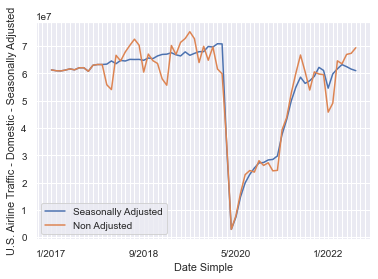

In [7]:
dom_adj_plot = sns.lineplot(data=transportation, x='Date Simple', y='U.S. Airline Traffic - Domestic - Seasonally Adjusted', label = "Seasonally Adjusted");
dom_plot = sns.lineplot(data=transportation, x='Date Simple', y='U.S. Airline Traffic - Domestic - Non Seasonally Adjusted', label = "Non Adjusted");
for ind, label in enumerate(dom_plot.get_xticklabels()):
    if ind % 2 == 0:  
        label.set_visible(True)
    else:
        label.set_visible(False)
for ind, label in enumerate(dom_adj_plot.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.legend()
plt.plot();

Here we see a significant impact from the Covid-19 pandemic, but also the smoothing effect of the seasonally adjusted feature. 

## Quantitative Variable #2: Auto Sales

One of the quantities we want to observe is the auto sales and which transportation features are associated with those autosales. We're going to do so by picking out a couple features and analyzing their relation in a scatter plot. 

### 1. Unemployment vs Auto Sales

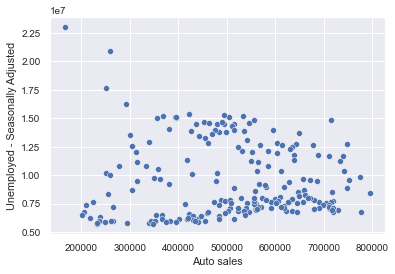

In [8]:
sns.scatterplot(data = transportation, x = "Auto sales", y = "Unemployed - Seasonally Adjusted");

We see there's a rough, but not very strong negative correlation between auto sales and unemployment, which makes sense as when unemployment decreases we should see an increase in auto sales. 

### 2. Auto sales vs Highway Fuel Price - Regular Gasoline

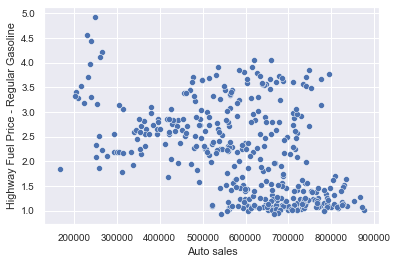

In [9]:
sns.scatterplot(data = transportation, x = "Auto sales", y = "Highway Fuel Price - Regular Gasoline");

Here we see a negative trend between fuel price and auto sales, which ones again follows rather logically, because as the price for fuel decreases people are more likely to drive and thus more likely to purchase a car. 

### 3. Passenger Rail Passengers vs Auto Sales 

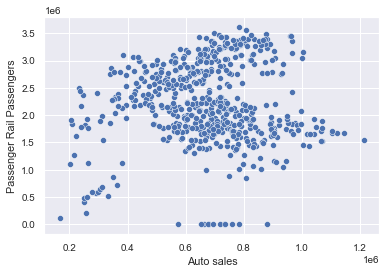

In [10]:
sns.scatterplot(data = transportation, x = "Auto sales", y = "Passenger Rail Passengers");

Here we see a positive correlation, which makes a less intuitive sense, as you would expect that as rail passengers increase less people need to drive a car, so auto sales would decrease. However, there is a potential confounding factor of growing wealth and growing population.

## Categorical Variable #1: Air Traffic during COVID pandemic and before

In [11]:
df1 = transportation.iloc[854:878]
df2 = transportation.iloc[878:902]

Text(0, 0.5, 'Air Traffic (in millions)')

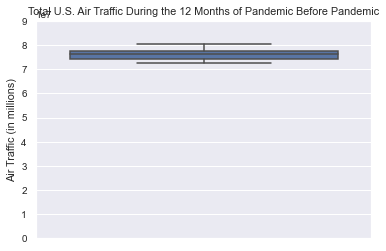

In [12]:
sns.boxplot(data = df1, y = 'U.S. Airline Traffic - Total - Seasonally Adjusted')
plt.ylim(0,90000000)
plt.title("Total U.S. Air Traffic During the 12 Months of Pandemic Before Pandemic")
plt.ylabel("Air Traffic (in millions)")

Text(0, 0.5, 'Air Traffic (in millions)')

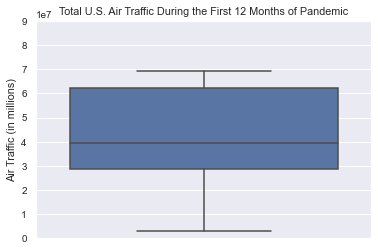

In [13]:
sns.boxplot(data = df2, y = 'U.S. Airline Traffic - Total - Seasonally Adjusted')
plt.ylim(0,90000000)
plt.title("Total U.S. Air Traffic During the First 12 Months of Pandemic")
plt.ylabel("Air Traffic (in millions)")

With this visualization, we decided to categorize Air Traffic into months during the COVID Pandemic and months before the COVID Pandemic. We can see that without the pandemic, Air Traffic in the U.S. is within a narrow interquartile range between 75 million to a bit over 78 million every month. During the first 12 months of the pandemic however, air traffic (understandly) was significantly less with an interquartile range between 29 million and 62 million each month. We decided to only include data from 12 months before and after March 2020 to get rid of other confounding factors that may affect air traffic (recession, etc.). This visualization is relevant because we are trying to see if increasing investment or covid leads to changes in the utilization of certain forms of transportation. This is one relationship we may want to follow up on.

## Categorical Variable #2: Investment Spending 

We're going to take a look at breaking Investment Spending on the air into two categories. First let's look at the generalization of this spending to see why it makes sense to split it into categories.

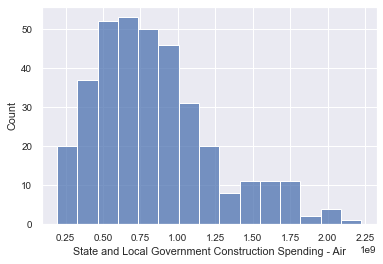

In [14]:
sns.histplot(transportation, x='State and Local Government Construction Spending - Air');

It seems bimodal with a group less than 1.25 billion and a group greater than.

In [15]:
air_spend_high = transportation[transportation['State and Local Government Construction Spending - Air'] >= 1250000000]
air_spend_low = transportation[transportation['State and Local Government Construction Spending - Air'] <= 1250000000]

We'll compare air travel in these two groups.

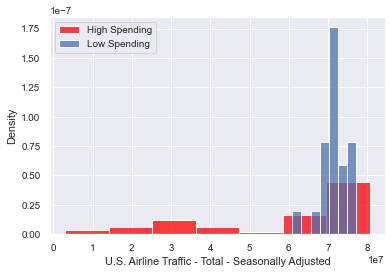

In [16]:
sns.histplot(air_spend_high, x= 'U.S. Airline Traffic - Total - Seasonally Adjusted', label = "High Spending", color = 'red', stat = 'density')
sns.histplot(air_spend_low, x= 'U.S. Airline Traffic - Total - Seasonally Adjusted', label = "Low Spending", stat = 'density')
plt.legend();

Here we see something that potentially needs more context. The high spending years tend to have lower airline traffic. However, could that be due to the time, or is there more spending in attempts to increase airline traffic. It is hard to tell, and could be a situation that we could take a deeper look at. 

# 2. Research Question #1 : Can we effectively predict auto sales with transportation features?

In this section we will try to predict the Auto Sales using a variety of models. We will ultimately evaluate their success using MSE on the test set.

In [17]:
X = transportation.loc[:, transportation.columns != "Auto sales"]
X = X[850:907]
y = transportation[["Auto sales"]][850:907]
X = X.drop(["Date", "Date Simple", "Index"], axis = 1).dropna(axis=1)

In [18]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

Let's take a look at the Auto Sales in a histogram 

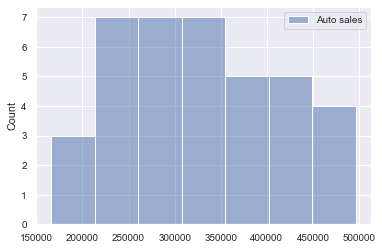

In [19]:
sns.histplot(y_train);

### Feature Selection

Let's find the features that are most associated with autosales

In [20]:
trans_corr_frame = transportation[850:907].drop(["Date", "Date Simple", "Index"], axis = 1).dropna(axis=1)
cor = trans_corr_frame.corr()
highest_correlation = abs(cor["Auto sales"]).sort_values(ascending = False)[2:]
#first we get rid of auto sales
best_features = highest_correlation[highest_correlation > 0.6]

This has left us with our best features, however some of these features appear to have potential to be highly correlated with eachother. We'll take a look at these and remove features that are highly correlated ith eachother to avoid any dependancies between our features. 

In [21]:
cor_feats = trans_corr_frame[best_features.index].corr().abs()
new_feats_cor_matrix = cor_feats.where(np.triu(np.ones(cor_feats.shape),k=1).astype(bool))

In [22]:
# here we'll drop one of the pair for any highly correlated pair 
dependant = [column for column in new_feats_cor_matrix.columns if any(new_feats_cor_matrix[column] > 0.951)]
best_feature_names = best_features.drop(dependant).index

In [23]:
# here we establish our features (we have 15 of them)
X_train = X_train[best_feature_names]
X_test = X_test[best_feature_names]

### Training Nonparametric Model

To create our nonparametric model we'll utilize a decision tree regressor. This is effective because it gives us a relatively interpretable regression of our auto sales. 

In [24]:
from sklearn.tree import DecisionTreeRegressor
Nonparam_Model = DecisionTreeRegressor(random_state = 42)

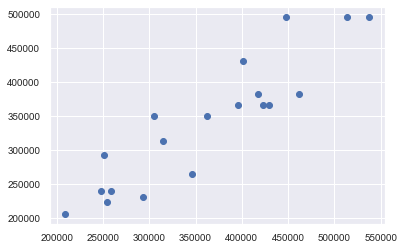

In [25]:
fitted_nonparam = Nonparam_Model.fit(X_train, y_train)
y_predict = fitted_nonparam.predict(X_test)
plt.scatter(y_test, y_predict);

Here we see visually that we tend to make relatively good predictions using our decision tree predictor

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print(f"MSE Of Test Set : {mean_squared_error(y_test, y_predict)}")
print(f"r2_score Of Test Set : {r2_score(y_test, y_predict)}")


MSE Of Test Set : 1932176315.7894738
r2_score Of Test Set : 0.7795211700476592


### Training GLM

The GLM we will utilize is Ordinary Least Squares, we determined it more succcesful to utilize an L2 penalty (that is ridge regression) to avoid overfitting. The Inverse Link function we are utilizing 

In [27]:
Data = pd.concat([X_train, y_train], axis = 1)
Data.columns = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p']

#### Frequentist 

/Users/neeldatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.11753e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


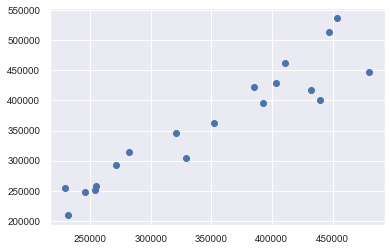

In [28]:
from sklearn.linear_model import Ridge
freq_lin_reg = Ridge()
fitted_lin_reg = freq_lin_reg.fit(X_train, y_train)
y_predict_lr = fitted_lin_reg.predict(X_test)
plt.scatter(y_predict_lr, y_test);

We can see this may be a more effective fit than our nonparametric model.

In [29]:
print(f"MSE Of Test Set : {mean_squared_error(y_test, y_predict_lr)}")
print(f"r2_score Of Test Set : {r2_score(y_test, y_predict_lr)}")

MSE Of Test Set : 1215405422.933811
r2_score Of Test Set : 0.8613112253905848


In [30]:
Ridge_params = fitted_lin_reg.coef_[0]

#### Bayesian

/Users/neeldatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


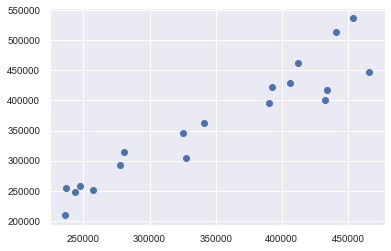

In [31]:
from sklearn.linear_model import BayesianRidge
freq_lin_reg_B = BayesianRidge()
fitted_lin_reg = freq_lin_reg_B.fit(X_train, y_train)
y_predict_lr = fitted_lin_reg.predict(X_test)
plt.scatter(y_predict_lr, y_test);

In [32]:
import pymc3 as pm
from pymc3 import glm
import statsmodels.api as sm

In [33]:
### TODO: Get this version of the Bayesian working instead of SKLearn
with pm.Model() as gaussian_model:
    glm.GLM.from_formula('p ~ a + b', Data)
    gaussian_trace = pm.sample(1000, cores=2, target_accept=0.95, init="adapt_diag", return_inferencedata=True)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, b, a, Intercept]


/Users/neeldatta/opt/anaconda3/lib/python3.9/site-packages/pymc3/step_methods/hmc/quadpotential.py:220: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(1, self._stds, out=self._inv_stds)
/Users/neeldatta/opt/anaconda3/lib/python3.9/site-packages/pymc3/step_methods/hmc/quadpotential.py:199: RuntimeWarning: invalid value encountered in multiply
  return np.multiply(self._var, x, out=out)


RuntimeError: Chain 0 failed.

In [ ]:
print(f"MSE Of Test Set : {mean_squared_error(y_test, y_predict_lr)}")
print(f"r2_score Of Test Set : {r2_score(y_test, y_predict_lr)}")

We see from utilizing all our methodologies that using both our metrics (r squared and MSE) that the best model was the Bayesian regression, the second best was frequentist Linear Regression, and the worst was our nonparametric decision tree regressor. Using the linear regression we experienced much more sucess utilizing a Ridge regression penalty so we ended up using that.

In [ ]:
data_fr = {'Params': best_feature_names, 'Score': abs(Ridge_params)}
df = pd.DataFrame(data_fr)
df.sort_values('Score', ascending = False)

We see that all but five. of our features are sent near zero by our Ridge regression, showing us that Labor Force Participation Rate, Transportation Employment (Rail Transportation), Light Truck Sales, and both Transportation Employment, Water Transportation and Transit and Ground are the features that best allow us to determine auto sales

 # 3. Research Question #2: Effect of Covid-19 and GDP on airline travel from a Casual Inference perspective 

In [ ]:
import warnings
warnings.filterwarnings("ignore")
pre_covid = transportation.iloc[855:878]
covid = transportation.iloc[878:901]
# this shows us that the most substansial difference pre and post covid was the Real GDP
print(abs(np.mean(pre_covid) - np.mean(covid)).sort_values(ascending = False).index[0])
pre_covid = pre_covid[['U.S. Airline Traffic - Total - Seasonally Adjusted', 'Real Gross Domestic Product - Seasonally Adjusted']]
covid = covid[['U.S. Airline Traffic - Total - Seasonally Adjusted', 'Real Gross Domestic Product - Seasonally Adjusted']]

In [ ]:
import math
#creating an effective measure of GDP since its not measured monthly 
All_Data = transportation.iloc[855:901][['U.S. Airline Traffic - Total - Seasonally Adjusted', 'State and Local Government Construction Spending - Infrastructure', 'Real Gross Domestic Product - Seasonally Adjusted']]
GDP = list(All_Data['Real Gross Domestic Product - Seasonally Adjusted'])
GDP_est = np.ones(All_Data.shape[0])
for i in range(All_Data.shape[0]):
    if not math.isnan(GDP[i]) :
        GDP_est[i] = GDP[i]
    else: 
        if i % 3 == 1:
            GDP_est[i] = GDP[i - 1] + ((GDP[i+2] - GDP[i - 1])/3)
        else: 
            GDP_est[i] = (GDP_est[i - 1] + GDP[i + 1])/2
All_Data['Real Gross Domestic Product - Seasonally Adjusted'] = GDP_est

Here we assume that GDP changes rather linearlly within a quarter, which doesn't seem too out of the ordinary given multiple economists educated guesses throughout that time frame. 

The confounding variable of Covid-19 is unobserved, that is its extremely diffcult to measure. Wether you measure cases, transmission, etc, etc it is very difficult to properly observe Covid-19. It also pretty obviously impacted both GDP and US Airline traffic. We're going to establish the following variables: <br>
$Z^{(i)} =$ Real Gross Domestic Product - Seasonally Adjusted

$W^{(i)} = $ State and Local Government Construction Spending - Infrastructure

$Y^{(i)} = $ U.S Airline Traffic - Total - Seasonally Adjusted

The only difficult assumption that we have to make here is that "State and Local Government Construction Spending - Infrastructure" is an effective instrumental variable. Covid likely did not impact the construction spending as infrastructure needs did not go away with the pandemic. It also is a component of the GDP and would likely have an impact on GDP. Finally, Infrastructure spending (since it doesn't include air related spending) should only affect airline traffic through the impact that GDP has on air traffic.  

For these questions I will be borrowing the "Fit OLS Model" function from Lab07

In [ ]:
import statsmodels.api as sm
def fit_OLS_model(df, target_variable, explanatory_variables, intercept = True):  
    target = df[target_variable]
    inputs = df[explanatory_variables]
    if intercept:
        inputs = sm.add_constant(inputs)
    
    fitted_model = sm.OLS(target, inputs).fit()
    return(fitted_model)

### Naive Least Squares

In [ ]:
naive_air_model = fit_OLS_model(All_Data, 'U.S. Airline Traffic - Total - Seasonally Adjusted', 'Real Gross Domestic Product - Seasonally Adjusted')
print(naive_air_model.summary())

Here we see that the naive relationship between GDP and Airline traffic is negative, which likely doesn't make intuitive sense but could be due to the confounding factor of the Covid-19 pandemic.

### 2SLS Model

#### First we predict Z using our instrumental variable. 

In [ ]:
gamma_air_model = fit_OLS_model(All_Data, 'Real Gross Domestic Product - Seasonally Adjusted', "State and Local Government Construction Spending - Infrastructure")
print(gamma_air_model.summary())

In [ ]:
intercept_OLS = gamma_air_model.params[0] 
gamma1_OLS = gamma_air_model.params[1] 
Z_hat = intercept_OLS + gamma1_OLS*All_Data["State and Local Government Construction Spending - Infrastructure"]
All_Data["Predict_GDP"] = Z_hat

In [ ]:
beta_air_model = fit_OLS_model(All_Data, 'U.S. Airline Traffic - Total - Seasonally Adjusted', 'Predict_GDP')
print(beta_air_model.summary())

We see that are estimate for the impact of GDP on air traffic here is positive, although virtually zero (can be seen visually below). Earlier when we did a naive we saw the impact of GDP to be a large negative amount. This shows that that our confounder Covid-19 plays a substansial role as a confounder, and the impact of GDP on Air traffic is negliglible, once we control for Covid-19 using an instrumental variable.  